In [1]:
from __future__ import division
from collections import OrderedDict


import sympy
from sympy import mpmath, integrate, diff, exp, log, ln, sqrt, lambdify
from sympy import atanh

from sympy import Function, Symbol

from sympy import init_printing        # pretty printing
from sympy.parsing.sympy_parser import parse_expr

def PartialDerivatives(func, dpar, pretty=0, *params):
    '''
    PartialDerivatives(func, dpar, *params) # or **params for dictionary notation.

    func:   str, the function equation.  Not name, but the math of the function.  
            Make sure the parameters within the function match all of those parameters 
            within the parameter list.

            *** WARNING ***: sympy requires input of
            ln for natural log and 
            log for log base 10
            However, it outputs log and log10.

    dpar:	str, parameter you want to take the derivative with respect to. 'alpha'
    
    pretty: 0 is default.  pretty printing is off.  use 1 to turn pretty printing on.

    params:	list of str, pass a list of strings containing the parameter names.  
            Make sure they match all of those included in the function.



    EXAMPLE:  

    lower = 'energy * norm_band *((energy/enorm)**alpha)*(exp(-((energy*(2.+alpha))/epeak)))'

    pars = 'alpha beta epeak norm_band enorm energy'.split(' ')

    PartialDerivatives(func=lower, dpar='epeak', 0, *pars)

    '''
    print 'func:   ', func
    print 'dpar:   ', dpar
    print 'pretty: ', pretty
    print 'params: ', params

    if pretty:
        init_printing(pretty_print=True)
    else:
        init_printing(pretty_print=False)

    for par in params:
        locals()[par] = Symbol('%s'%par, real=True)

    return diff(eval(func), eval(dpar), method='quad')


In [2]:
pars = ['alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy']

eqn = 'ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))'


for dpar in pars:
    print('Partial Derivative of SBPL WRT:   %s'%dpar)
    print('--'*30)
    print( str(PartialDerivatives(eqn, str(dpar), 0, *pars)) )
    print('\n')
    


Partial Derivative of SBPL WRT:   alpha
------------------------------------------------------------
func:    ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))
dpar:    alpha
pretty:  0
params:  ('alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy')
10**(delta*atanh((alpha + beta + 4.0)/(alpha - beta)))*delta*ebreak*(1/(alpha - beta) - (alpha + beta + 4.0)/(alpha - beta)**2)*log(10)/(1 - (alpha + beta + 4.0)**2/(alpha - beta)**2)


Partial Derivative of SBPL WRT:   beta
------------------------------------------------------------
func:    ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))
dpar:    beta
pretty:  0
params:  ('alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy')
10**(delta*atanh((alpha + beta + 4.0)/(alpha - beta)))*delta*ebreak*(1/(alpha - beta) + (alpha + beta + 4.0)/(alpha - beta)**2)*log(10)/(1 - (alpha + beta + 4.0)**2/(alpha - beta)**2)


Partial Derivative of SBPL WRT:   ebreak
------------------------------------------------------------
func:   

# Latex Equation form

In [3]:
init_printing(pretty_print=True)

# Partial Derivative WRT $\alpha$

In [4]:
wrt_alpha = PartialDerivatives(eqn, 'alpha', 1, *pars)

func:    ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))
dpar:    alpha
pretty:  1
params:  ('alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy')


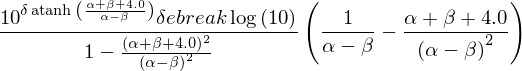

In [5]:
wrt_alpha

## Steps:

$s = \delta \tanh^{-1}(u)$ where $u=\frac{\alpha + \beta + 4}{\alpha-\beta}$

\begin{equation}
\frac{\partial f}{\partial \alpha} = \frac{10^s \delta E_{bk} \ln(10)}{1-u^2}\left( \frac{1}{\alpha - \beta} - \frac{u}{\alpha-\beta} \right)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial \alpha} = \frac{10^s \delta E_{bk} \ln(10)}{(1-u)(1+u)}\left( \frac{1}{\alpha - \beta} - \frac{u}{\alpha-\beta} \right)
\end{equation}

$x = 10^s \delta E_{bk} \ln(10)$

\begin{equation}
\frac{\partial f}{\partial \alpha} = \frac{x}{(1-u)(1+u)}\left( \frac{1}{\alpha - \beta} - \frac{u}{\alpha-\beta} \right)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial \alpha} = 
\frac{x}{(1-u)(1+u)(\alpha - \beta)}\left( \frac{1}{1} - \frac{u}{1} \right)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial \alpha} = 
\frac{x}{(1-u)(1+u)(\alpha - \beta)}\left( 1-u \right)
\end{equation}

Put the variables of $x$ back in and cancel out the $(1-u)/(1-u)$:
\begin{equation}
\frac{\partial f}{\partial \alpha} = E_{bk}10^s \ln(10) \frac{\delta}{(1+u)(\alpha-\beta)}
\end{equation}

# Partial Derivative WRT $\beta$

In [6]:
wrt_beta = PartialDerivatives(eqn, 'beta', 1, *pars)

func:    ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))
dpar:    beta
pretty:  1
params:  ('alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy')


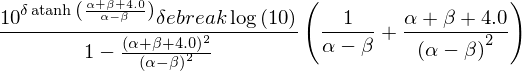

In [7]:
wrt_beta

## Steps:

$s = \delta \tanh^{-1}(u)$ where $u=\frac{\alpha + \beta + 4}{\alpha-\beta}$

\begin{equation}
\frac{\partial f}{\partial \beta} = \frac{10^s \delta E_{bk} \ln(10)}{1-u^2}\left( \frac{1}{\alpha - \beta} + \frac{u}{\alpha-\beta} \right)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial \beta} = \frac{10^s \delta E_{bk} \ln(10)}{(1-u)(1+u)}\left( \frac{1}{\alpha - \beta} + \frac{u}{\alpha-\beta} \right)
\end{equation}

$x = 10^s \delta E_{bk} \ln(10)$

\begin{equation}
\frac{\partial f}{\partial \beta} = \frac{x}{(1-u)(1+u)}\left( \frac{1}{\alpha - \beta} + \frac{u}{\alpha-\beta} \right)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial \beta} = 
\frac{x}{(1-u)(1+u)(\alpha - \beta)}\left( \frac{1}{1} + \frac{u}{1} \right)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial \beta} = 
\frac{x}{(1-u)(1+u)(\alpha - \beta)}\left( 1+u \right)
\end{equation}

Put the variables of $x$ back in and cancel out the $(1+u)/(1+u)$:
\begin{equation}
\frac{\partial f}{\partial \beta} = E_{bk}10^s \ln(10) \frac{\delta}{(1-u)(\alpha-\beta)}
\end{equation}

# Partial Derivative WRT $E_{bk}$

In [8]:
wrt_ebreak = PartialDerivatives(eqn, 'ebreak', 1, *pars)

func:    ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))
dpar:    ebreak
pretty:  1
params:  ('alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy')


In [9]:
wrt_ebreak

## Steps:
$s = \delta \tanh^{-1}(u)$ where $u=\frac{\alpha + \beta + 4}{\alpha-\beta}$

\begin{equation}
\frac{\partial f}{\partial  E_{bk}} = 10^s 
\end{equation}

# Partial Derivative WRT Amplitude

In [10]:
wrt_norm = PartialDerivatives(eqn, 'norm', 1, *pars)

func:    ebreak*(10**(delta*(atanh((alpha+beta+4.0)/(alpha-beta)))))
dpar:    norm
pretty:  1
params:  ('alpha', 'beta', 'ebreak', 'norm', 'delta', 'energy')


In [11]:
wrt_norm